In [3]:
import numpy as np

X = np.array([[3,4,5],[2,1,7], [1,1,1]])
y = np.array([2,3,1])
x0 = X[0,:]
x1 = X[1,:]
x2 = X[2,:]

def fadd(x, y):
    return x + y

def fmul(x, y):
    return x * y

def fsub(x, y):
    return x - y

def pdivide(x, y):
    return np.divide(x, y, out=np.copy(x), where=x!=0)

def p(c):
    return np.sin(np.pi*c)

import tengp

from gpbenchmarks import get_data

X, y = get_data('nguyenf12', 6, -1, 1)
X = np.c_[np.ones(len(X)), X]

funset = tengp.FunctionSet()
funset.add(np.add, 2)
funset.add(np.multiply, 2)
funset.add(np.subtract, 2)
funset.add(pdivide, 2)

params = tengp.Parameters(3, 1, 1, 2, funset, real_valued=True)

bounds = tengp.individual.IndividualBuilder(params).create().bounds
bounds

[3, 2, 2, 3, 3, 3, 4]

In [33]:
import pygmo as pg
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
vectors = []

class cost_function:
    def __init__(self, X, Y, params, bounds):
        self.params = params
        self.bounds = bounds
        self.X = X
        self.Y = Y
    
    def fitness(self, x):
        vectors.append(x)
        individual = tengp.individual.NPIndividual(
            list(x), self.bounds, self.params
        )
        
        pred = individual.transform(self.X)
        
        try:
            return [mean_squared_error(pred, y)]
        except ValueError:
            return [10000000000]
        
    def get_bounds(self):
        return ([0]*len(self.bounds), [b for b in self.bounds])

In [9]:
prob = pg.problem(cost_function(X, y, params, bounds))
prob

Problem name: <class '__main__.cost_function'>
	Global dimension:			7
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0, 0, 0, 0, ... ]
	Upper bounds: [3, 2, 2, 3, 3, ... ]

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none

In [13]:
%%time
algo = pg.algorithm(pg.cmaes(gen=250, seed=42, force_bounds=True))
algo.set_verbosity(1)
pop = pg.population(prob, 20)
pop = algo.evolve(pop)
pop

CPU times: user 500 ms, sys: 15.6 ms, total: 516 ms
Wall time: 519 ms


In [14]:
pop

Problem name: <class '__main__.cost_function'>
	Global dimension:			7
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0, 0, 0, 0, ... ]
	Upper bounds: [3, 2, 2, 3, 3, ... ]

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 2660

	Thread safety: none

Population size: 20

List of individuals: 
#0:
	ID:			16330103528153829699
	Decision vector:	[2.24998, 0, 0.99988, 1.20309, 2.55524, ... ]
	Fitness vector:		[1.23825e-07]
#1:
	ID:			14802824815316358753
	Decision vector:	[2.24975, 0, 0.999553, 1.2092, 2.55821, ... ]
	Fitness vector:		[1.40419e-07]
#2:
	ID:			9747489520032685859
	Decision vector:	[2.24974, 0.000448893, 0.999867, 1.20687, 2.55448, ... ]
	Fitness vector:		[1.56319e-07]
#3:
	ID:			8923071234670370311
	Decision vector:	[2.24979, 0.000268951, 0.999937, 1.2015, 2

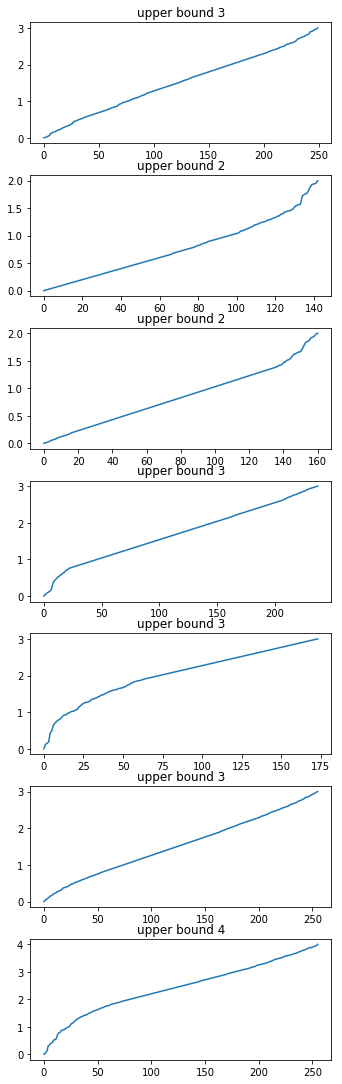

In [43]:
fig, axs = plt.subplots(7, 1, figsize=(5,15))
fig.tight_layout()

for index, (bound, ax) in enumerate(zip(bounds, axs)):
    ax.plot(np.unique([round(x[index], 2) for x in vectors]))
    ax.set_title(f'upper bound {bound}')

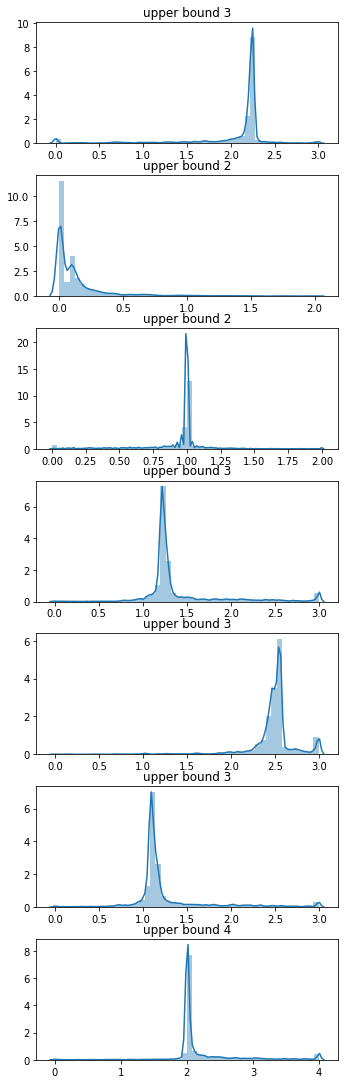

In [44]:
fig, axs = plt.subplots(7, 1, figsize=(5,15))
fig.tight_layout()

for index, (bound, ax) in enumerate(zip(bounds, axs)):
    sns.distplot([round(x[index], 2) for x in vectors], ax=ax)
    ax.set_title(f'upper bound {bound}')